In [154]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [163]:
num_agents = 200
num_iterations = 25
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [164]:
default_params = [0.0020000000949949026, 0.003000000026077032, 0.15000000596046448, 0.25]
default_metrics = utils.read_csv("temp/default.csv")[0][5:]

In [165]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[5, 6]).transpose().to_numpy()
           for i in range(num_iterations)]


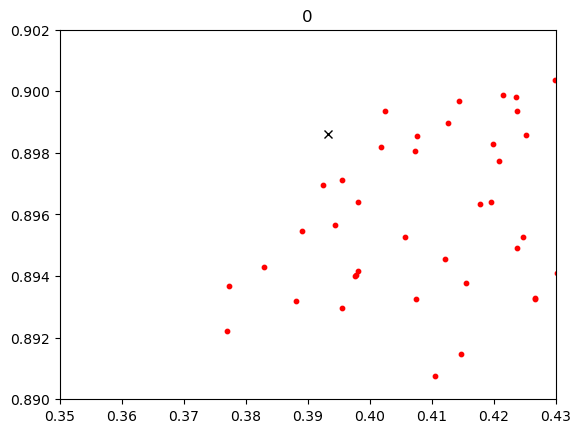

In [166]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.35, 0.43)
    ax.set_ylim(0.89, 0.902)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [37]:
params = [np.transpose(pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[0, 1, 2, 3]).to_numpy())
                          for i in range(num_iterations)]
# params = []
# for i in range(num_iterations):
#     temp = utils.read_csv("history/parameters/iteration" + str(i) + ".csv")
#     params.append(np.transpose(temp))

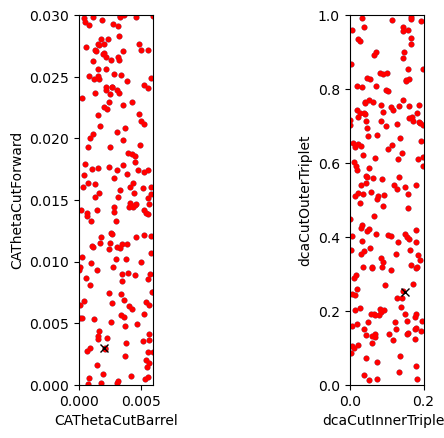

In [38]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(params_lb[0], params_ub[0])
    ax.set_ylim(params_lb[1], params_ub[1])
    s = ax.scatter(params[0][0], params[0][1], s=10)
    s = ax.scatter(params[i][0], params[i][1], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][0], params[num_iterations - 1][1], c="green", s=10)
    s = ax.plot(default_params[0], default_params[1], c="black", marker="x")
    ax.set_xlabel(params_names[0])
    ax.set_ylabel(params_names[1])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(params_lb[2], params_ub[2])
    ax.set_ylim(params_lb[3], params_ub[3])
    s = ax.scatter(params[0][2], params[0][3], s=10)
    s = ax.scatter(params[i][2], params[i][3], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][2], params[num_iterations - 1][3], c="green", s=10)
    s = ax.plot(default_params[2], default_params[3], c="black", marker="x")
    ax.set_xlabel(params_names[2])
    ax.set_ylabel(params_names[3])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/params.gif', writer='pillow')

In [167]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, 6].argsort()]
pareto_x = [particle[6] for particle in pareto_front]
pareto_y = [1 - particle[5] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [168]:
len(pareto_front)

138

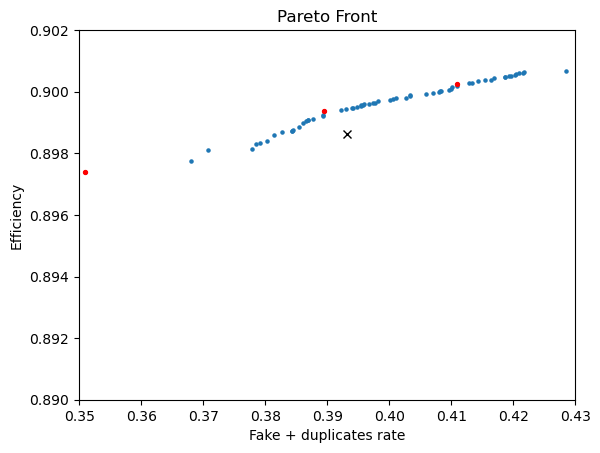

In [189]:
point1 = pareto_front[72]
point2 = pareto_front[92]
point3 = pareto_front[121]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[6], point2[6], point3[6]], [1 - point1[5], 1 - point2[5], 1 - point3[5]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.35, 0.43)
plt.ylim(0.89, 0.902)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.show()

In [190]:
print([point1[i] for i in range(5)])
print([point2[i] for i in range(5)])
print([point3[i] for i in range(5)])

[0.00136154005328973, 0.01944422806941612, 0.10120036981471371, 0.32270914439895676, 0.01598491826925394]
[0.001764250034601499, 0.003613788272638752, 0.11507694944033327, 0.39246788303915564, 0.46553686136318134]
[0.001769761886373172, 0.003522558233445766, 0.14424679309037114, 0.7713713130813556, 0.19090935727599528]


In [191]:
print(point1)
print(point2)
print(point3)

[0.00136154 0.01944423 0.10120037 0.32270914 0.01598492 0.1026036
 0.35102036]
[0.00176425 0.00361379 0.11507695 0.39246788 0.46553686 0.10063268
 0.38956417]
[0.00176976 0.00352256 0.14424679 0.77137131 0.19090936 0.09975488
 0.41093463]


In [44]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))

